In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np
import helperFunctions
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("SimpleDataSetWithNewTarget.csv")

In [3]:
le = preprocessing.LabelEncoder()
data['artist_id'] = le.fit_transform(data['artist_id'].astype('str'))

In [4]:
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title' ,'song_hotttnesss', 'artist_id', 'artist_familiarity']
train = data.drop(drop_list, axis=1)

In [5]:
Y = copy.deepcopy(train.bbhot)
Y.shape

(10001,)

In [6]:
train1 = train.drop("bbhot", axis=1)

In [7]:
#Function to evaluate my model with Cross validation
from sklearn.model_selection import cross_val_score
def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    return scores.mean()

In [8]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(train1, Y)
acc_xgb = testingModel(xgb1, train1, Y)

Scores: [0.60614832 0.626958   0.639037   0.66406585 0.56349736 0.65568157
 0.60006295 0.58448669 0.62677057 0.60640756]
Mean: 0.6173115880858587
Standard Deviation: 0.02971062533697904


In [10]:
#write model to file

helperFunctions.saveModel(xgb1, 'model2.dat')

In [10]:
#Use XGBoost Model to predict whether a song will be a hit

ser_3, popularity = helperFunctions.getSpotifyTrackInfo(song_name='lose yourself', artist_name='eminem')

song3 = pd.DataFrame(ser_3).transpose()

song3 = helperFunctions.matchOrder(correctShape= train1,incorrectShape=song3)

prediction = xgb1.predict_proba(song3)

print("Predicted Hit Probability(according to our model): {:.2f}%\nActual Popularity (according to Spotify): {}".format(prediction[0][1]*100, popularity))

Predicted Hit Probability(according to our model): 37.31%
Actual Popularity (according to Spotify): 77


In [15]:
#Use XGBoost Model to predict whether a playlist will be a hit
playList = [('blood on the leaves','kanye'),
            ('black dog', 'led zeppelin'),
            ('funny girl', 'laura rizzotto'),
            ('thank u next', 'ariana grande'),
            ('papaoutai','stromae'),
            ('new slang','the shins')]
songPopularities = helperFunctions.getSpotifyInfoForLists(playList)
i=0
for ser4, pop in songPopularities:
    song4 = pd.DataFrame(ser4).transpose()
    song4 = helperFunctions.matchOrder(correctShape= train1,incorrectShape=song4)
    prediction2 = xgb1.predict_proba(song4)
    print("{}\nPredicted Hit Probability(according to our model): {:.2f}%\nActual Popularity (according to Spotify): {}\n".format(playList[i][0],prediction2[0][1]*100, pop))
    i+=1



blood on the leaves
Predicted Hit Probability(according to our model): 71.61%
Actual Popularity (according to Spotify): 65

black dog
Predicted Hit Probability(according to our model): 60.14%
Actual Popularity (according to Spotify): 70

funny girl
Predicted Hit Probability(according to our model): 11.61%
Actual Popularity (according to Spotify): 38

thank u next
Predicted Hit Probability(according to our model): 58.06%
Actual Popularity (according to Spotify): 100

papaoutai
Predicted Hit Probability(according to our model): 21.73%
Actual Popularity (according to Spotify): 55

new slang
Predicted Hit Probability(according to our model): 18.39%
Actual Popularity (according to Spotify): 69



In [13]:
#Use XGBoost Model to predict whether a playlist will be a hit

#Get this from Spotify App > Right Click PLaylist > Share > SpotifyURI
spotifyUri = 'spotify:user:123862312:playlist:1JdWDyDMEUlUvl9oWfi4p1'.split(':')[-1]


songList = helperFunctions.getSpotifyPlaylistInfo(spotifyUri)
formattedSongList = [(x[0], x[1][0]) for x in songList]    
# songIDs=[x[2].split(':')[-1] for x in songList]
# print(songIDs)
# playlistMetrics = helperFunctions.getSpotifyTrackInfo(spotifyIds=songIDs)
# print(formattedSongList)
songPopularities = helperFunctions.getSpotifyInfoForLists(formattedSongList)
# print(songPopularities)
i=0
for ser4, pop in songPopularities:
# for ser4, pop in songPopularities:
    song4 = pd.DataFrame(ser4).transpose()
    song4 = helperFunctions.matchOrder(correctShape= train1,incorrectShape=song4)
    prediction2 = xgb1.predict_proba(song4)
    print("{} - {}\nPredicted Hit Probability(according to our model): {:.2f}%\nActual Popularity (according to Spotify): {}\n".format(formattedSongList[i][0],formattedSongList[i][1],prediction2[0][1]*100, pop))
    i+=1




list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
Who Am I
Predicted Hit Probability(according to our model): 36.22%
Actual Popularity (according to Spotify): 49

Stay So
Predicted Hit Probability(according to our model): 26.45%
Actual Popularity (according to Spotify): 58

Tek Weh Yuh Heart
Predicted Hit Probability(according to our model): 55.56%
Actual Popularity (according to Spotify): 47

Hard Drive
Predicted Hit Probability(according to our model): 14.58%
Actual Popularity (according to Spotify): 57

Real Bad Gal
Predicted Hit Probability(according to our model): 32.76%
Actual Popularity (according to Spotify): 46

Silence
Predicted Hit Probability(according to our model): 30.83%
Actual Popularity (according to Spotify): 56

They Don't Know
Predicted Hit Probability(according to our model): 13.75%
Actual Popularity (according to Spotify): 50

Load Up
Predicted Hit Probability(according to our model): 28.95%
Act

In [10]:
#21 Pilot
ser_ = pd.Series({
 'duration': 202.333,
 'key': 4,
 'loudness': -5.677,
 'mode': 0,
 'tempo': 169.977,
  'artist_hotttnesss': 0.83,
   'end_of_fade_in': 0.26680,
    'start_of_fade_out': 197.77596,
    'mode_confidence': 0.041,
    'key_confidence': 0.000,
    'time_signature': 4,
    'time_signature_confidence': 1.000,
    'year': 2016 })
ser_

duration                      202.33300
key                             4.00000
loudness                       -5.67700
mode                            0.00000
tempo                         169.97700
artist_hotttnesss               0.83000
end_of_fade_in                  0.26680
start_of_fade_out             197.77596
mode_confidence                 0.04100
key_confidence                  0.00000
time_signature                  4.00000
time_signature_confidence       1.00000
year                         2016.00000
dtype: float64

In [11]:
#Phily Joe John
ser_2 = pd.Series({
 'duration': 449.49333 ,
 'key': 6,
 'loudness': -14.575,
 'mode': 1,
 'tempo': 104.609,
  'artist_hotttnesss': 0.33,
   'end_of_fade_in': 0.26680,
    'start_of_fade_out': 444.9698,
    'mode_confidence': 0.314,
    'key_confidence': 0.218,
    'time_signature': 4,
    'time_signature_confidence': 0.817,
    'year': 1992 })
ser_2

duration                      449.49333
key                             6.00000
loudness                      -14.57500
mode                            1.00000
tempo                         104.60900
artist_hotttnesss               0.33000
end_of_fade_in                  0.26680
start_of_fade_out             444.96980
mode_confidence                 0.31400
key_confidence                  0.21800
time_signature                  4.00000
time_signature_confidence       0.81700
year                         1992.00000
dtype: float64

In [12]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 13 columns):
artist_hotttnesss            10001 non-null float64
duration                     10001 non-null float64
end_of_fade_in               10001 non-null float64
key                          10001 non-null int64
key_confidence               10001 non-null float64
loudness                     10001 non-null float64
mode                         10001 non-null int64
mode_confidence              10001 non-null float64
start_of_fade_out            10001 non-null float64
tempo                        10001 non-null float64
time_signature               10001 non-null int64
time_signature_confidence    10001 non-null float64
year                         10001 non-null int64
dtypes: float64(9), int64(4)
memory usage: 1015.8 KB


In [13]:
test = pd.DataFrame(ser_).transpose()
test.describe()

,duration,key,loudness,mode,tempo,artist_hotttnesss,end_of_fade_in,start_of_fade_out,mode_confidence,key_confidence,time_signature,time_signature_confidence,year
count,1.000,1.0,1.000,1.0,1.000,1.00,1.0000,1.00000,1.000,1.0,1.0,1.0,1.0
mean,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0
25%,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0
50%,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0
75%,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0
max,202.333,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.0,4.0,1.0,2016.0


In [14]:
test = test.append(ser_2, ignore_index = True)
test.head()

,duration,key,loudness,mode,tempo,artist_hotttnesss,end_of_fade_in,start_of_fade_out,mode_confidence,key_confidence,time_signature,time_signature_confidence,year
0,202.33300,4.0,-5.677,0.0,169.977,0.83,0.2668,197.77596,0.041,0.000,4.0,1.000,2016.0
1,449.49333,6.0,-14.575,1.0,104.609,0.33,0.2668,444.96980,0.314,0.218,4.0,0.817,1992.0


In [36]:
test = helperFunctions.matchOrder(test, train1)
prediction = xgb1.predict_proba(test)
prediction

array([[0.90238225, 0.09761772],
       [0.9022906 , 0.09770939],
       [0.62671256, 0.37328744],
       ...,
       [0.9075839 , 0.09241613],
       [0.84873515, 0.15126483],
       [0.92889434, 0.07110564]], dtype=float32)

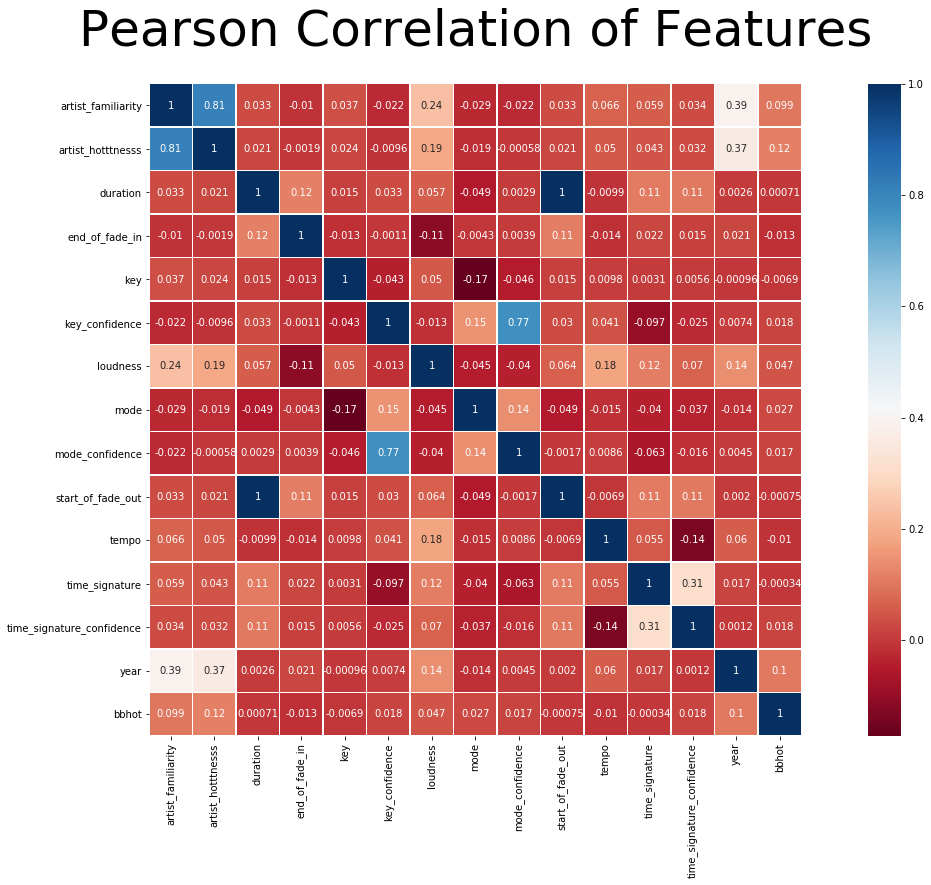

In [37]:
#Looking at the heatmap and check for correlation
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title' ,'song_hotttnesss', 'artist_id']
trainx = data.drop(drop_list, axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(24,12))
plt.title('Pearson Correlation of Features', y=1.05, size=50)
sns.heatmap(trainx.astype(float).corr(),linewidths=0.5,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()